In [1]:
import numpy as numpy
import pandas as pd 
from sklearn.datasets import make_classification

In [16]:
X, y = make_classification(
                           n_samples=100, # number of samples
                           n_features=5, # number of features
                           n_informative=3, # number of informative features
                           n_redundant=1, # number of redundant features
                           n_repeated=0, # number of duplicated features
                           n_classes=2)

In [17]:
df = pd.DataFrame(X, columns = ['col1', 'col2', 'col3', 'col4', 'col5'])

In [18]:
df['target'] = y
print(df.head())
print  (df.shape)

       col1      col2      col3      col4      col5  target
0  0.236872  0.271053 -0.551345  0.530280  0.080804       1
1  0.384761  0.037378 -0.452327  1.752638  0.055885       1
2 -0.500590  1.573653 -0.353605 -0.384056  0.835814       0
3  1.561186  1.269970 -1.912854  0.642878  1.263711       1
4 -1.263290  1.359895 -0.023721 -1.568908  0.181616       0
(100, 6)


In [19]:
def sample_rows(df, percent):
    return df.sample(frac=percent, replace=True)

In [20]:
def sample_feature(df, percent):
    cols = random.sampe(df.colums.tolist()[:-1], int(percent*df.shape[-1]))

In [21]:
def combined_sampling(df, row_percent, col_percent):
    new_df = sample_rows(df, row_percent)
    return sample_feature(new_df, col_percent)

### Row Sampling

In [23]:
df1 = sample_rows(df, 0.1)

In [25]:
df2 = sample_rows(df, 0.1)

In [26]:
df3 = sample_rows(df, 0.1)

In [27]:
df3.shape

(10, 6)

In [28]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()


In [29]:
clf1.fit(df1.iloc[:,:-1], df1.target)
clf2.fit(df2.iloc[:,:-1], df2.target)
clf3.fit(df3.iloc[:,:-1], df3.target)

DecisionTreeClassifier()

In [31]:
from sklearn.tree import plot_tree


[Text(0.5, 0.75, 'x[0] <= -0.242\ngini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.625, 0.5, '  False')]

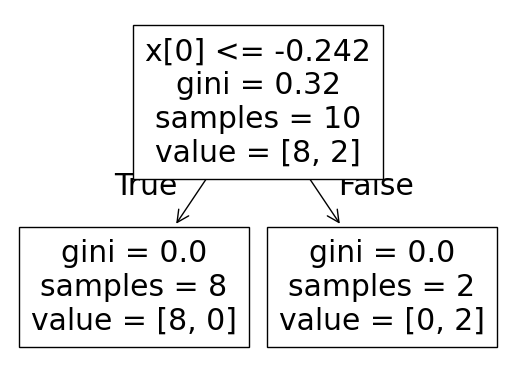

In [32]:
plot_tree (clf1)

[Text(0.5, 0.75, 'x[0] <= -0.153\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.625, 0.5, '  False')]

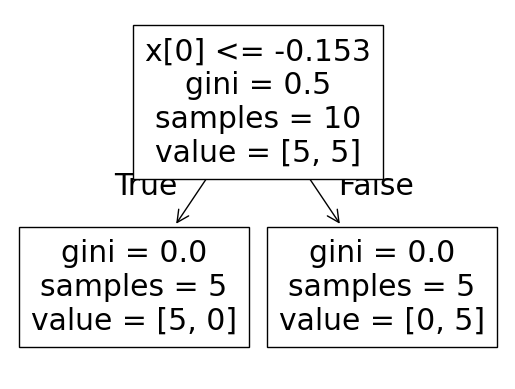

In [33]:
plot_tree (clf2)

[Text(0.5, 0.75, 'x[0] <= -0.186\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.625, 0.5, '  False')]

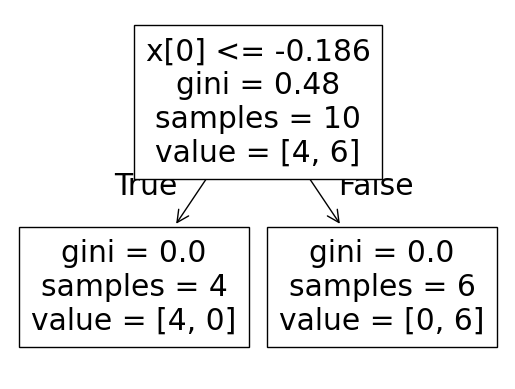

In [34]:
plot_tree(clf3)

In [37]:
import numpy as np

clf3.predict(np.array([0.236872,  0.271053, -0.551345 , 0.530280 , 0.080804]).reshape(1, -1))

C:\Users\samir\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [38]:
clf3.predict(np.array([-0.500590,  1.573653, -0.353605, -0.384056,  0.835814  ]).reshape(1, -1))

C:\Users\samir\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [39]:
clf1.predict(np.array([-0.500590,  1.573653, -0.353605, -0.384056,  0.835814  ]).reshape(1, -1))

C:\Users\samir\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [40]:
clf2.predict(np.array([-0.500590,  1.573653, -0.353605, -0.384056,  0.835814  ]).reshape(1, -1))

C:\Users\samir\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

### Similar for feature sampling too